# Analysing airbnb data 

### 1: Exploratory questions

In [1]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/edit?usp=sharing"
csv_url = url.replace("/edit?usp=sharing", "/export?format=csv")

# Load the sheet data into a DataFrame
df = pd.read_csv(csv_url, index_col=0)

# Display the DataFrame
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


#### Load in Data

One can use the link to get the sheet in, but you have to specify the export format in the end of the url.

In [2]:
import pandas as pd

# Base URL for the Google Sheets file
base_url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=csv&gid="

# List of `gid`s, sheet names, and their corresponding countries
sheets_info = [
    {"gid": "1813557111", "sheet_name": "amsterdam_weekdays", "country": "Netherlands"},
    {"gid": "1671143450", "sheet_name": "amsterdam_weekends", "country": "Netherlands"},
    {"gid": "1474041232", "sheet_name": "athens_weekdays", "country": "Greece"},
    {"gid": "993539767", "sheet_name": "athens_weekends", "country": "Greece"},
    {"gid": "295085637", "sheet_name": "berlin_weekends", "country": "Germany"},
    {"gid": "305266500", "sheet_name": "berlin_weekdays", "country": "Germany"},
    {"gid": "1009970054", "sheet_name": "barcelona_weekdays", "country": "Spain"},
    {"gid": "1739828988", "sheet_name": "barcelona_weekends", "country": "Spain"},
    {"gid": "1438277999", "sheet_name": "budapest_weekdays", "country": "Hungary"},
    {"gid": "1326018133", "sheet_name": "budapest_weekends", "country": "Hungary"},
    {"gid": "82202766", "sheet_name": "lisbon_weekdays", "country": "Portugal"},
    {"gid": "1355881051", "sheet_name": "lisbon_weekends", "country": "Portugal"},
    {"gid": "9179440", "sheet_name": "london_weekdays", "country": "England"},
    {"gid": "58206735", "sheet_name": "london_weekends", "country": "England"},
    {"gid": "1452107999", "sheet_name": "paris_weekdays", "country": "France"},
    {"gid": "1803477090", "sheet_name": "paris_weekends", "country": "France"},
    {"gid": "1127044053", "sheet_name": "rome_weekdays", "country": "Italy"},
    {"gid": "1238155247", "sheet_name": "rome_weekends", "country": "Italy"},
    {"gid": "671930913", "sheet_name": "vienna_weekdays", "country": "Austria"},
    {"gid": "1950822222", "sheet_name": "vienna_weekends", "country": "Austria"}
]

# List to store all DataFrames
df_list = []

# Retrieve data from each sheet
for sheet in sheets_info:
    # Construct the specific URL for the current sheet
    csv_url = f"{base_url}{sheet['gid']}"
    
    # Load data into a DataFrame
    sheet_df = pd.read_csv(csv_url)
    
    # Delete the first column by index
    sheet_df.drop(sheet_df.columns[0], axis=1, inplace=True)
    
    # Rename 'realSum' to 'price'
    sheet_df.rename(columns={'realSum': 'price'}, inplace=True)
    
    # Extract city and day type from the sheet name
    city, day_type = sheet['sheet_name'].split('_')
    
    # Add the `city`, `day_type`, and `country` columns
    sheet_df['city'] = city.capitalize()  # Capitalize to keep city names consistent
    sheet_df['day_type'] = 'Weekday' if day_type == 'weekdays' else 'Weekend'
    sheet_df['country'] = sheet['country']  # Assign country from sheets_info
    
    # Append the DataFrame to the list
    df_list.append(sheet_df)

# Concatenate all DataFrames into a single, large DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
combined_df


,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Weekend,Austria
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Weekend,Austria
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,...,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,Vienna,Weekend,Austria
51705,301.054157,Private room,False,True,2,False,0,0,10,87,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Weekend,Austria


#### Explanation:

Specified the gid (for each sheet) and then iterated through all of them and concatinated them. 
Also delete first row, specify country and city, change the name of realSum to price.

#### How many listings are in each city in total and also per type of day?


In [3]:
# Total listings per city
listings_per_city = combined_df.groupby('city').size()
print("Total listings per city:")
print(listings_per_city)

# Listings per city and day type
listings_per_city_day_type = combined_df.groupby(['city', 'day_type']).size()
print("\nListings per city and day type:")
print(listings_per_city_day_type)


Total listings per city:
city
Amsterdam    2080
Athens       5280
Barcelona    2833
Berlin       2484
Budapest     4022
Lisbon       5763
London       9993
Paris        6688
Rome         9027
Vienna       3537
dtype: int64

Listings per city and day type:
city       day_type
Amsterdam  Weekday     1103
           Weekend      977
Athens     Weekday     2653
           Weekend     2627
Barcelona  Weekday     1555
           Weekend     1278
Berlin     Weekday     1284
           Weekend     1200
Budapest   Weekday     2074
           Weekend     1948
Lisbon     Weekday     2857
           Weekend     2906
London     Weekday     4614
           Weekend     5379
Paris      Weekday     3130
           Weekend     3558
Rome       Weekday     4492
           Weekend     4535
Vienna     Weekday     1738
           Weekend     1799
dtype: int64


#### Which city has the biggest proportion of superhosts?


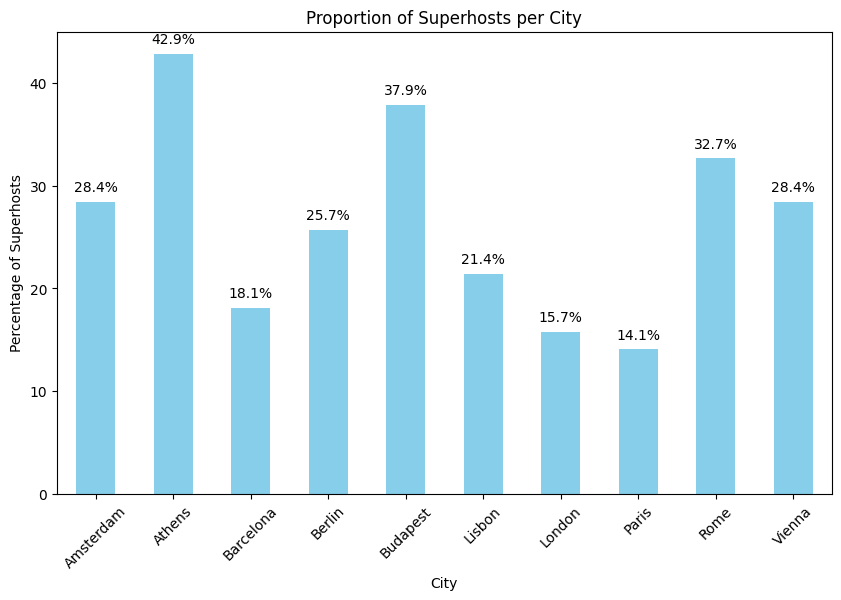

In [4]:
import matplotlib.pyplot as plt

# Calculate the total listings and the superhost listings per city
total_listings_per_city = combined_df.groupby('city').size()
superhost_listings_per_city = combined_df[combined_df['host_is_superhost'] == True].groupby('city').size()

# Calculate the proportion of superhosts
superhost_proportion = (superhost_listings_per_city / total_listings_per_city) * 100

# Plot the proportion of superhosts per city
plt.figure(figsize=(10, 6))
superhost_proportion.plot(kind='bar', color='skyblue')
plt.title("Proportion of Superhosts per City")
plt.xlabel("City")
plt.ylabel("Percentage of Superhosts")
plt.xticks(rotation=45)

# Add labels above bars
for index, value in enumerate(superhost_proportion):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.show()


#### Which cities have listings with more than four rooms?


In [5]:
# Filter listings with more than four bedrooms
listings_with_more_than_four_bedrooms = combined_df[combined_df['bedrooms'] > 4]

# Get unique cities with listings that have more than four bedrooms
cities_with_large_listings = listings_with_more_than_four_bedrooms['city'].unique()

print("Cities with listings that have more than four bedrooms:")
print(cities_with_large_listings)


Cities with listings that have more than four bedrooms:
['Amsterdam' 'Berlin' 'Barcelona' 'Lisbon' 'London' 'Paris' 'Rome']


#### Which city has the most entire home/apt type listings?


In [6]:
# Assuming there is a column named 'room_type' that indicates the type of listing

# Filter for listings that are 'Entire home/apt'
entire_home_listings = combined_df[combined_df['room_type'] == 'Entire home/apt']

# Count the number of entire home listings per city
entire_home_count_per_city = entire_home_listings['city'].value_counts()

# Get the city with the most 'Entire home/apt' listings
city_with_most_entire_homes = entire_home_count_per_city.idxmax()
max_entire_home_count = entire_home_count_per_city.max()

print(f"The city with the most 'Entire home/apt' listings is {city_with_most_entire_homes} with {max_entire_home_count} listings.")


The city with the most 'Entire home/apt' listings is Rome with 5561 listings.


#### Are ratings typically high across listings, or is there a wide variation?


In [7]:
# Filter out rows with missing values in 'guest_satisfaction_overall'
filtered_df = combined_df.dropna(subset=['guest_satisfaction_overall'])

# Calculate variance and standard deviation of ratings
rating_variance = filtered_df['guest_satisfaction_overall'].var()
rating_std_dev = filtered_df['guest_satisfaction_overall'].std()

print(f"Variance of guest satisfaction ratings: {rating_variance:.2f}")
print(f"Standard deviation of guest satisfaction ratings: {rating_std_dev:.2f}")

Variance of guest satisfaction ratings: 80.02
Standard deviation of guest satisfaction ratings: 8.95


Since the evaluation is measured from 0-100, a stdv. of 8.95 is pretty high, so ratings vary. 

#### How does person_capacity vary across listings? What is the most common capacity of listings?


In [8]:
# Calculate the most common capacity
most_common_capacity = combined_df['person_capacity'].mode()[0]

print(f"The most common person capacity across listings is: {most_common_capacity}")

The most common person capacity across listings is: 2


 #### Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.


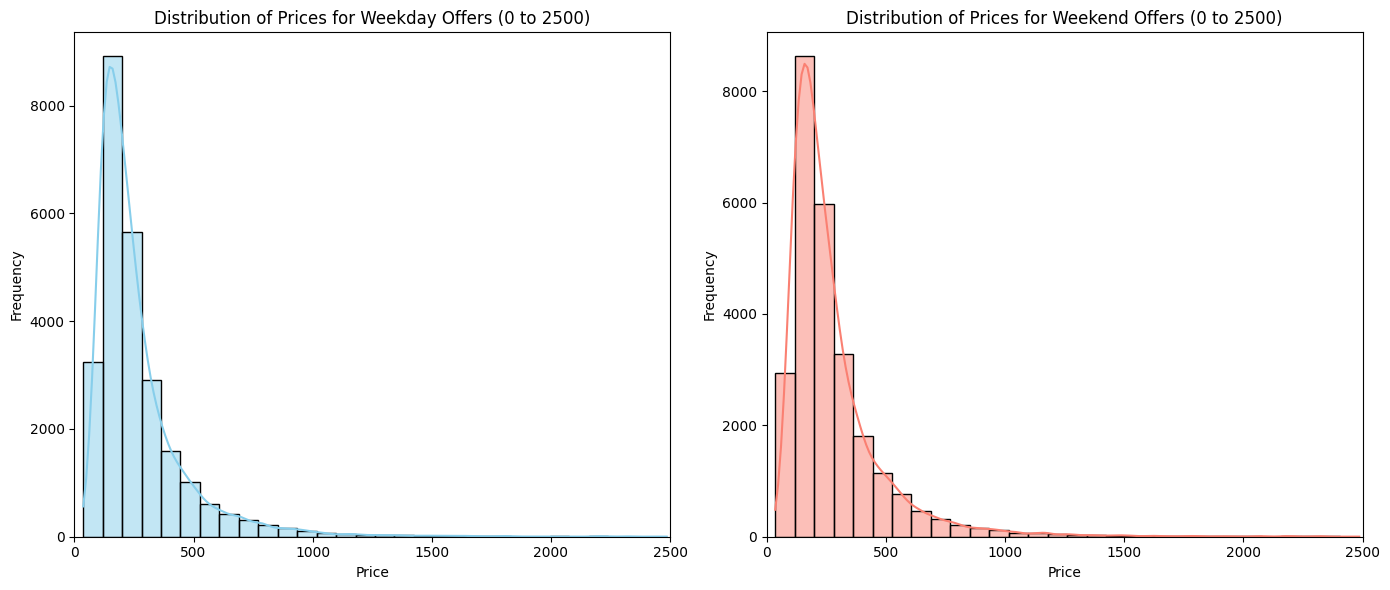

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter prices to be within the range 0 to 2500 for better visualization
weekday_prices = combined_df[(combined_df['day_type'] == 'Weekday') & (combined_df['price'] <= 2500)]['price']
weekend_prices = combined_df[(combined_df['day_type'] == 'Weekend') & (combined_df['price'] <= 2500)]['price']

# Plot histograms and KDE plots for the filtered price range
plt.figure(figsize=(14, 6))

# Weekday prices
plt.subplot(1, 2, 1)
sns.histplot(weekday_prices, kde=True, color='skyblue', bins=30)
plt.title("Distribution of Prices for Weekday Offers (0 to 2500)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2500)

# Weekend prices
plt.subplot(1, 2, 2)
sns.histplot(weekend_prices, kde=True, color='salmon', bins=30)
plt.title("Distribution of Prices for Weekend Offers (0 to 2500)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2500)

plt.tight_layout()
plt.show()


Data looks pretty skewed. Maybe a log transformation helps.

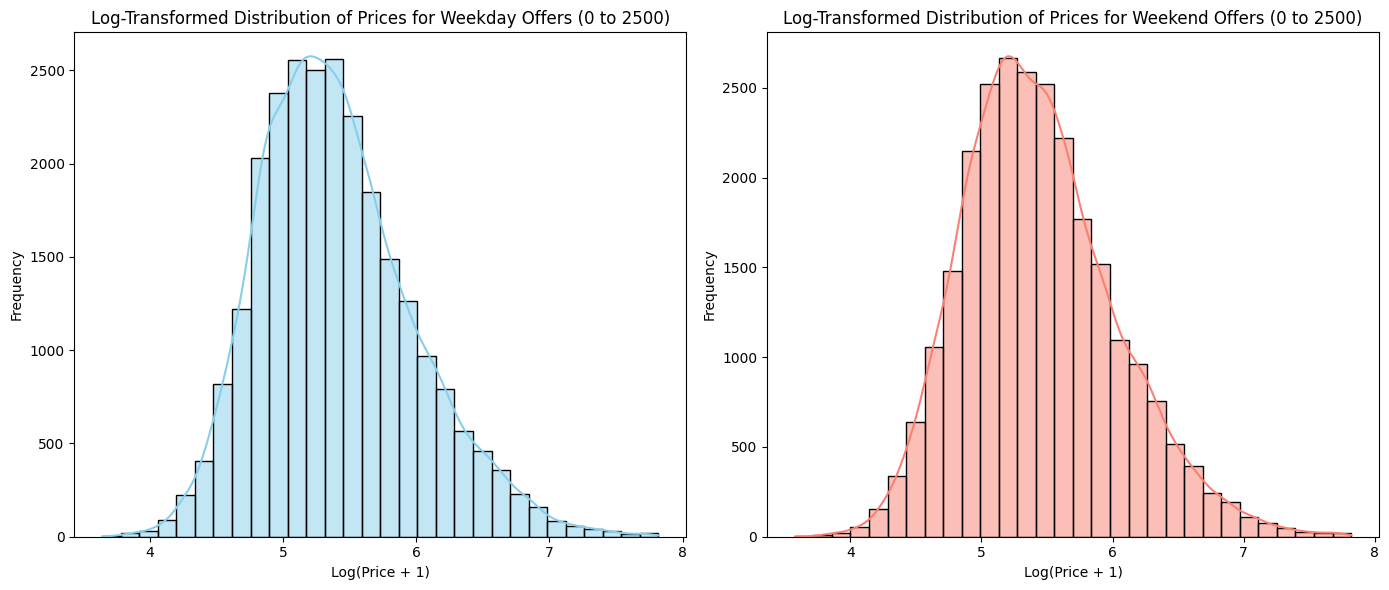

In [10]:

# Filter prices to be within the range 0 to 2500 for better visualization
weekday_prices = combined_df[(combined_df['day_type'] == 'Weekday') & (combined_df['price'] <= 2500)]['price']
weekend_prices = combined_df[(combined_df['day_type'] == 'Weekend') & (combined_df['price'] <= 2500)]['price']

# Apply log transformation to prices (log(1 + Price) to handle zero values)
weekday_prices_log = np.log1p(weekday_prices)
weekend_prices_log = np.log1p(weekend_prices)

# Plot transformed distributions
plt.figure(figsize=(14, 6))

# Log-transformed Weekday prices
plt.subplot(1, 2, 1)
sns.histplot(weekday_prices_log, kde=True, color='skyblue', bins=30)
plt.title("Log-Transformed Distribution of Prices for Weekday Offers (0 to 2500)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")

# Log-transformed Weekend prices
plt.subplot(1, 2, 2)
sns.histplot(weekend_prices_log, kde=True, color='salmon', bins=30)
plt.title("Log-Transformed Distribution of Prices for Weekend Offers (0 to 2500)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Plot the distribution of guest_satisfaction_overall ratings. 


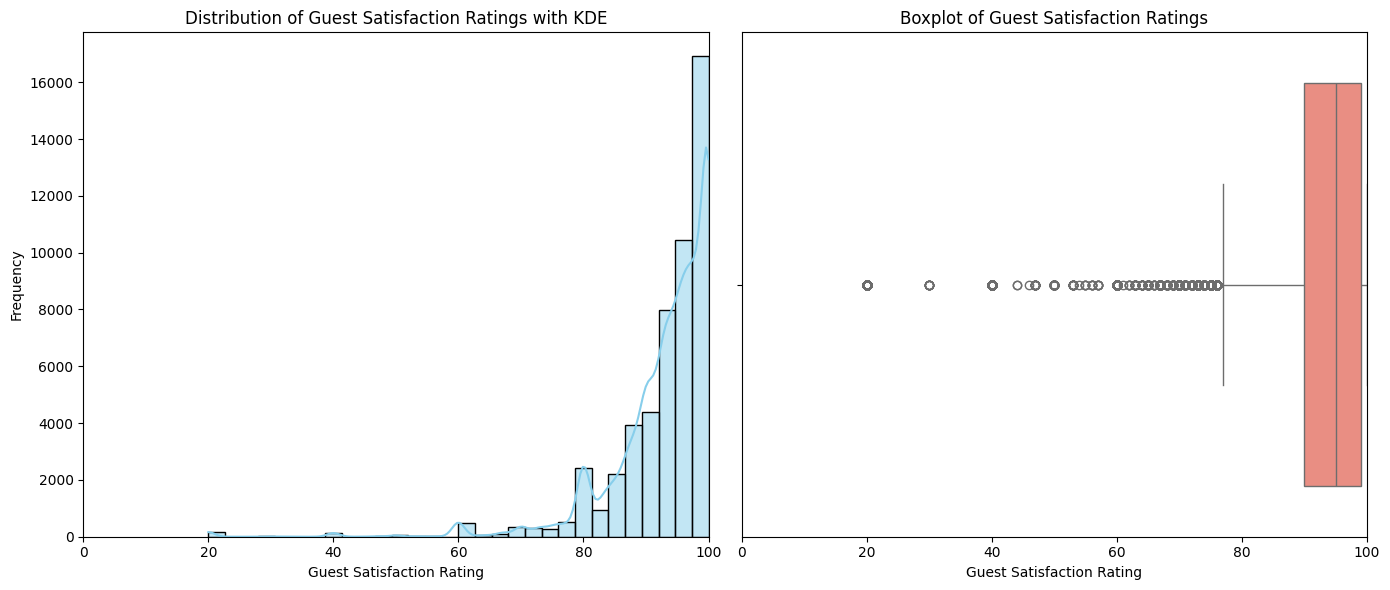

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with two subplots side by side
plt.figure(figsize=(14, 6))

# First plot: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(combined_df['guest_satisfaction_overall'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Guest Satisfaction Ratings with KDE")
plt.xlabel("Guest Satisfaction Rating")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # Assuming ratings are on a scale from 0 to 100

# Second plot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df['guest_satisfaction_overall'], color='salmon')
plt.title("Boxplot of Guest Satisfaction Ratings")
plt.xlabel("Guest Satisfaction Rating")
plt.xlim(0, 100)  # Assuming ratings are on a scale from 0 to 100

plt.tight_layout()
plt.show()


#### Examine the distribution of cleanliness_rating.

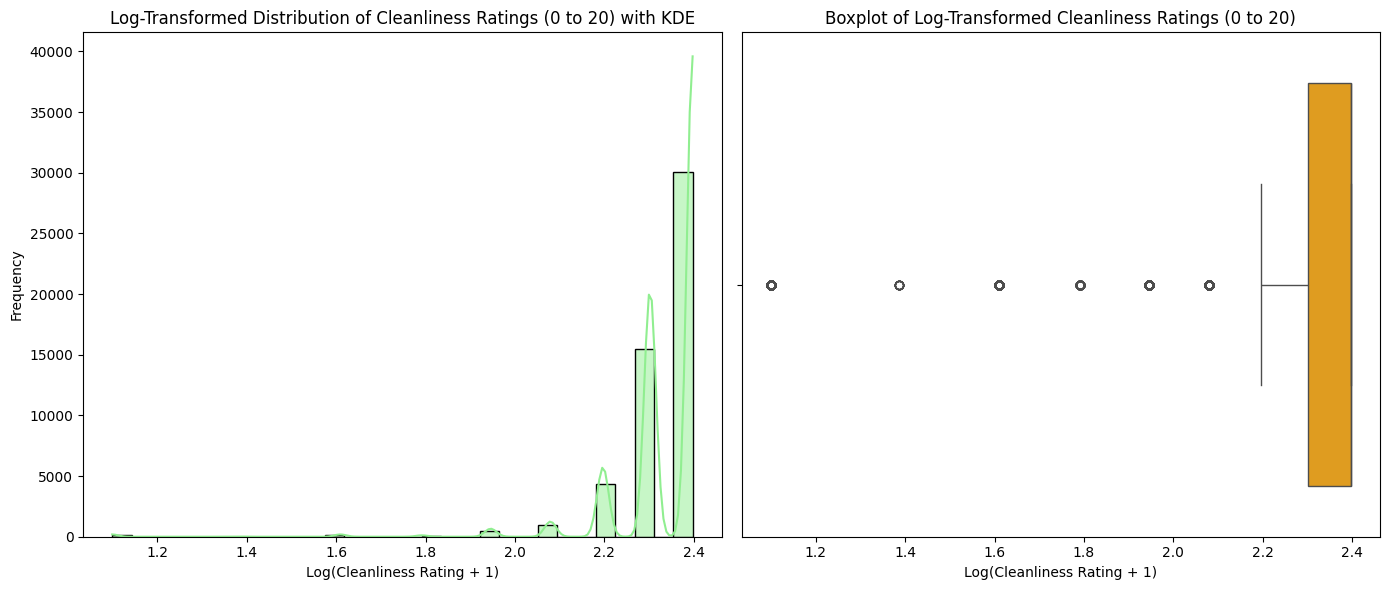

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter cleanliness ratings to be within the range 0 to 20
cleanliness_filtered = combined_df[(combined_df['cleanliness_rating'] <= 20)]['cleanliness_rating']

# Apply log transformation to filtered cleanliness ratings
cleanliness_log = np.log1p(cleanliness_filtered)

# Set up the figure with two subplots side by side
plt.figure(figsize=(14, 6))

# First plot: Histogram with KDE for log-transformed cleanliness rating (filtered data)
plt.subplot(1, 2, 1)
sns.histplot(cleanliness_log, kde=True, color='lightgreen', bins=30)
plt.title("Log-Transformed Distribution of Cleanliness Ratings (0 to 20) with KDE")
plt.xlabel("Log(Cleanliness Rating + 1)")
plt.ylabel("Frequency")

# Second plot: Boxplot for log-transformed cleanliness rating (filtered data)
plt.subplot(1, 2, 2)
sns.boxplot(x=cleanliness_log, color='orange')
plt.title("Boxplot of Log-Transformed Cleanliness Ratings (0 to 20)")
plt.xlabel("Log(Cleanliness Rating + 1)")

plt.tight_layout()
plt.show()


### 2: Questions for testing

#### Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.

Hypothesis: London, Paris and Berlin are probably the most expensive cities. Lisbon, Budapest and Athens are probably the cheapest. So we compare those in pairs. 

T-test between London and Lisbon:
T-statistic: 15.9934, P-value: 0.0000
Result: There is a significant difference in prices between London and Lisbon (p < 0.05)

T-test between London and Paris:
T-statistic: -3.7436, P-value: 0.0002
Result: There is a significant difference in prices between London and Paris (p < 0.05)

T-test between London and Budapest:
T-statistic: 24.0608, P-value: 0.0000
Result: There is a significant difference in prices between London and Budapest (p < 0.05)

T-test between Berlin and Athens:
T-statistic: 8.7962, P-value: 0.0000
Result: There is a significant difference in prices between Berlin and Athens (p < 0.05)



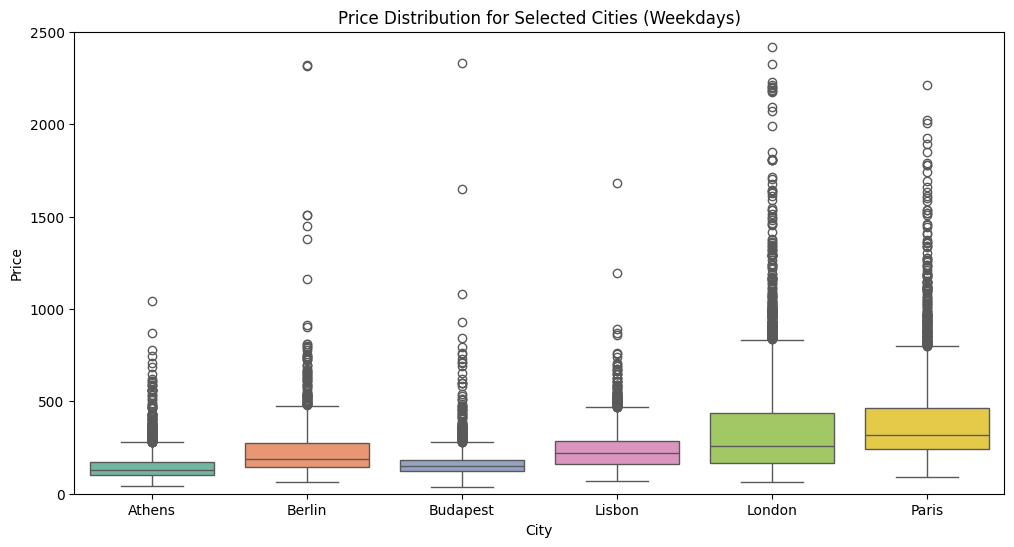

In [13]:
from scipy.stats import ttest_ind

# Filter data for weekday prices only
weekday_data = combined_df[combined_df['day_type'] == 'Weekday']

# Define city pairs to compare
city_pairs = [("London", "Lisbon"), ("London", "Paris"), ("London", "Budapest"), ("Berlin", "Athens")]

# Perform t-tests and print results
for city1, city2 in city_pairs:
    # Extract prices for each city
    prices_city1 = weekday_data[weekday_data['city'] == city1]['price']
    prices_city2 = weekday_data[weekday_data['city'] == city2]['price']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(prices_city1, prices_city2, equal_var=False)  # Welch's t-test for unequal variance
    
    # Print results
    print(f"T-test between {city1} and {city2}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    # Interpret the result
    if p_value < 0.05:
        print(f"Result: There is a significant difference in prices between {city1} and {city2} (p < 0.05)\n")
    else:
        print(f"Result: There is no significant difference in prices between {city1} and {city2} (p >= 0.05)\n")

# Visualization with Boxplot for all cities in the pairs
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekday_data[weekday_data['city'].isin([city for pair in city_pairs for city in pair])],
            x='city', y='price', hue='city', palette='Set2', legend=False)
plt.title("Price Distribution for Selected Cities (Weekdays)")
plt.xlabel("City")
plt.ylabel("Price")
plt.ylim(0, 2500)  # Adjust y-axis limit if needed
plt.show()


There is a significance difference between the groups. 

#### Does the price tend to be higher on weekends?

In [14]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
import numpy as np
import warnings

# Suppress all warnings for this section
warnings.filterwarnings("ignore")

# Split data into weekday and weekend prices
weekday_prices = combined_df[combined_df['day_type'] == 'Weekday']['price']
weekend_prices = combined_df[combined_df['day_type'] == 'Weekend']['price']

# 1. Calculate mean and median for weekday and weekend prices
mean_weekday = np.mean(weekday_prices)
mean_weekend = np.mean(weekend_prices)
median_weekday = np.median(weekday_prices)
median_weekend = np.median(weekend_prices)

print(f"Mean price on weekdays: {mean_weekday:.2f}")
print(f"Mean price on weekends: {mean_weekend:.2f}")
print(f"Median price on weekdays: {median_weekday:.2f}")
print(f"Median price on weekends: {median_weekend:.2f}\n")

# 2. Test for normality using the Shapiro-Wilk test
shapiro_weekday = shapiro(weekday_prices)
shapiro_weekend = shapiro(weekend_prices)

print("Shapiro-Wilk Test for Weekday Prices:")
print(f"Statistic: {shapiro_weekday.statistic:.4f}, P-value: {shapiro_weekday.pvalue:.4f}")
print("Result: " + ("Normal distribution" if shapiro_weekday.pvalue >= 0.05 else "Not normal distribution") + "\n")

print("Shapiro-Wilk Test for Weekend Prices:")
print(f"Statistic: {shapiro_weekend.statistic:.4f}, P-value: {shapiro_weekend.pvalue:.4f}")
print("Result: " + ("Normal distribution" if shapiro_weekend.pvalue >= 0.05 else "Not normal distribution") + "\n")

# 3. Perform the appropriate test based on normality results
if shapiro_weekday.pvalue >= 0.05 and shapiro_weekend.pvalue >= 0.05:
    # Use t-test if both distributions are normal
    t_stat, p_value = ttest_ind(weekday_prices, weekend_prices, equal_var=False)
    print("T-Test between Weekday and Weekend Prices:")
else:
    # Use Mann-Whitney U-test if either distribution is not normal
    t_stat, p_value = mannwhitneyu(weekday_prices, weekend_prices, alternative='two-sided')
    print("Mann-Whitney U-Test between Weekday and Weekend Prices:")

print(f"Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: There is a significant difference in prices between weekdays and weekends (p < 0.05)")
else:
    print("Result: There is no significant difference in prices between weekdays and weekends (p >= 0.05)")


Mean price on weekdays: 275.68
Mean price on weekends: 283.96
Median price on weekdays: 207.15
Median price on weekends: 216.46

Shapiro-Wilk Test for Weekday Prices:
Statistic: 0.3191, P-value: 0.0000
Result: Not normal distribution

Shapiro-Wilk Test for Weekend Prices:
Statistic: 0.4390, P-value: 0.0000
Result: Not normal distribution

Mann-Whitney U-Test between Weekday and Weekend Prices:
Statistic: 320313415.0000, P-value: 0.0000
Result: There is a significant difference in prices between weekdays and weekends (p < 0.05)


The difference is significant. 

#### Are listings of superhosts more expensive than those of normal hosts?

Mean price for superhosts: 254.45
Mean price for normal hosts: 288.63
Median price for superhosts: 197.04
Median price for normal hosts: 217.55

Shapiro-Wilk Test for Superhost Prices:
Statistic: 0.3157, P-value: 0.0000
Result: Not normal distribution

Shapiro-Wilk Test for Normal Host Prices:
Statistic: 0.3869, P-value: 0.0000
Result: Not normal distribution

Mann-Whitney U-Test between Superhost and Normal Host Prices:
Statistic: 230623961.5000, P-value: 0.0000
Result: There is a significant difference in prices between superhosts and normal hosts (p < 0.05)


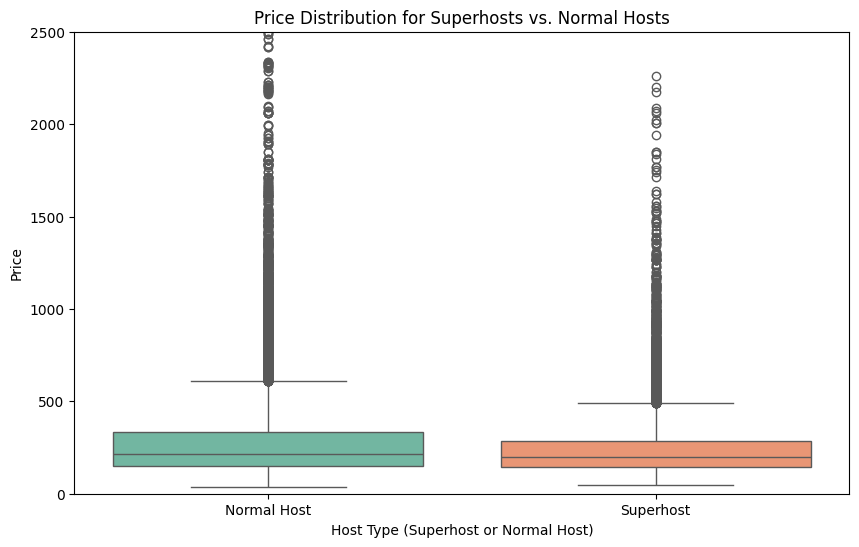

In [15]:
import warnings
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Suppress specific warning for Shapiro-Wilk test
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="scipy.stats.shapiro")

    # Split data into superhosts and normal hosts
    superhost_prices = combined_df[combined_df['host_is_superhost'] == True]['price']
    normalhost_prices = combined_df[combined_df['host_is_superhost'] == False]['price']

    # 1. Calculate mean and median prices for superhosts and normal hosts
    mean_superhost = superhost_prices.mean()
    mean_normalhost = normalhost_prices.mean()
    median_superhost = superhost_prices.median()
    median_normalhost = normalhost_prices.median()

    print(f"Mean price for superhosts: {mean_superhost:.2f}")
    print(f"Mean price for normal hosts: {mean_normalhost:.2f}")
    print(f"Median price for superhosts: {median_superhost:.2f}")
    print(f"Median price for normal hosts: {median_normalhost:.2f}\n")

    # 2. Test for normality using the Shapiro-Wilk test
    shapiro_superhost = shapiro(superhost_prices)
    shapiro_normalhost = shapiro(normalhost_prices)

    print("Shapiro-Wilk Test for Superhost Prices:")
    print(f"Statistic: {shapiro_superhost.statistic:.4f}, P-value: {shapiro_superhost.pvalue:.4f}")
    print("Result: " + ("Normal distribution" if shapiro_superhost.pvalue >= 0.05 else "Not normal distribution") + "\n")

    print("Shapiro-Wilk Test for Normal Host Prices:")
    print(f"Statistic: {shapiro_normalhost.statistic:.4f}, P-value: {shapiro_normalhost.pvalue:.4f}")
    print("Result: " + ("Normal distribution" if shapiro_normalhost.pvalue >= 0.05 else "Not normal distribution") + "\n")

# 3. Perform the appropriate test based on normality results
if shapiro_superhost.pvalue >= 0.05 and shapiro_normalhost.pvalue >= 0.05:
    # Use t-test if both distributions are normal
    t_stat, p_value = ttest_ind(superhost_prices, normalhost_prices, equal_var=False)
    print("T-Test between Superhost and Normal Host Prices:")
else:
    # Use Mann-Whitney U-test if either distribution is not normal
    t_stat, p_value = mannwhitneyu(superhost_prices, normalhost_prices, alternative='two-sided')
    print("Mann-Whitney U-Test between Superhost and Normal Host Prices:")

print(f"Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: There is a significant difference in prices between superhosts and normal hosts (p < 0.05)")
else:
    print("Result: There is no significant difference in prices between superhosts and normal hosts (p >= 0.05)")

# 4. Visualization with Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='host_is_superhost', y='price', hue='host_is_superhost', palette='Set2', legend=False)
plt.title("Price Distribution for Superhosts vs. Normal Hosts")
plt.xlabel("Host Type (Superhost or Normal Host)")
plt.ylabel("Price")
plt.xticks([0, 1], ['Normal Host', 'Superhost'])
plt.ylim(0, 2500)  # Adjust y-axis limit if needed
plt.show()


#### Are superhosts closer to the city center and metro station than normal hosts? (using MANOVA since it combines dist and metro_dist)


In [16]:

from scipy.stats import ttest_ind
from statsmodels.multivariate.manova import MANOVA

# Filter data for superhosts and normal hosts
superhost_data = combined_df[combined_df['host_is_superhost'] == True][['dist', 'metro_dist']]
normalhost_data = combined_df[combined_df['host_is_superhost'] == False][['dist', 'metro_dist']]

# Prepare data for MANOVA
# Add a group identifier
superhost_data['group'] = 'superhost'
normalhost_data['group'] = 'normal_host'

# Combine data for MANOVA
manova_data = pd.concat([superhost_data, normalhost_data])

# Perform MANOVA
maov = MANOVA.from_formula('dist + metro_dist ~ group', data=manova_data)
print(maov.mv_test())

# Interpretation: If the MANOVA result is significant, proceed to t-tests

# Perform separate t-tests for dist and metro_dist
t_stat_dist, p_value_dist = ttest_ind(superhost_data['dist'], normalhost_data['dist'], equal_var=False)
t_stat_metro, p_value_metro = ttest_ind(superhost_data['metro_dist'], normalhost_data['metro_dist'], equal_var=False)

print("\nT-Test Results:")
print(f"Distance to city center (dist): T-statistic={t_stat_dist:.4f}, P-value={p_value_dist:.4f}")
print(f"Distance to metro (metro_dist): T-statistic={t_stat_metro:.4f}, P-value={p_value_metro:.4f}")

# Interpretation of the t-test results
if p_value_dist < 0.05:
    print("There is a significant difference in distance to the city center between superhosts and normal hosts (p < 0.05).")
else:
    print("No significant difference in distance to the city center between superhosts and normal hosts (p >= 0.05).")

if p_value_metro < 0.05:
    print("There is a significant difference in distance to the metro between superhosts and normal hosts (p < 0.05).")
else:
    print("No significant difference in distance to the metro between superhosts and normal hosts (p >= 0.05).")


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.4177 2.0000 51704.0000 36036.2624 0.0000
         Pillai's trace 0.5823 2.0000 51704.0000 36036.2624 0.0000
 Hotelling-Lawley trace 1.3939 2.0000 51704.0000 36036.2624 0.0000
    Roy's greatest root 1.3939 2.0000 51704.0000 36036.2624 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
           group          Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.9955 2.0000 51704.0000 117.0640 0.0000
           Pilla

#### Are superhosts cleaner than normal hosts? (be aware that we cant know how clean they are, it is just the cleaniness rating we have)


Mean cleanliness rating for superhosts: 9.83
Mean cleanliness rating for normal hosts: 9.24

Shapiro-Wilk Test for Superhost Cleanliness Rating:
Statistic: 0.4094, P-value: 0.0000
Result: Not normal distribution

Shapiro-Wilk Test for Normal Host Cleanliness Rating:
Statistic: 0.6918, P-value: 0.0000
Result: Not normal distribution

Mann-Whitney U-Test between Superhost and Normal Host Cleanliness Ratings:
Statistic: 350501184.5000, P-value: 0.0000
Result: There is a significant difference in cleanliness ratings between superhosts and normal hosts (p < 0.05)


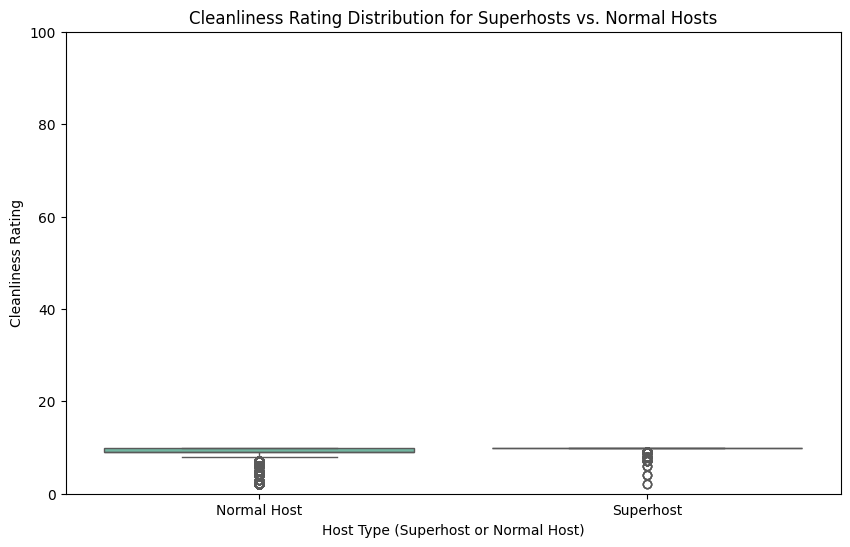

In [17]:
# Filter data into superhosts and normal hosts based on the 'host_is_superhost' column
superhost_cleanliness = combined_df[combined_df['host_is_superhost'] == True]['cleanliness_rating']
normalhost_cleanliness = combined_df[combined_df['host_is_superhost'] == False]['cleanliness_rating']

# 1. Calculate mean cleanliness rating for superhosts and normal hosts
mean_cleanliness_superhost = superhost_cleanliness.mean()
mean_cleanliness_normalhost = normalhost_cleanliness.mean()

print(f"Mean cleanliness rating for superhosts: {mean_cleanliness_superhost:.2f}")
print(f"Mean cleanliness rating for normal hosts: {mean_cleanliness_normalhost:.2f}\n")

# 2. Perform Shapiro-Wilk test for normality
shapiro_superhost = shapiro(superhost_cleanliness)
shapiro_normalhost = shapiro(normalhost_cleanliness)

print("Shapiro-Wilk Test for Superhost Cleanliness Rating:")
print(f"Statistic: {shapiro_superhost.statistic:.4f}, P-value: {shapiro_superhost.pvalue:.4f}")
print("Result: " + ("Normal distribution" if shapiro_superhost.pvalue >= 0.05 else "Not normal distribution") + "\n")

print("Shapiro-Wilk Test for Normal Host Cleanliness Rating:")
print(f"Statistic: {shapiro_normalhost.statistic:.4f}, P-value: {shapiro_normalhost.pvalue:.4f}")
print("Result: " + ("Normal distribution" if shapiro_normalhost.pvalue >= 0.05 else "Not normal distribution") + "\n")

# 3. Perform t-test or Mann-Whitney U-test based on normality results
if shapiro_superhost.pvalue >= 0.05 and shapiro_normalhost.pvalue >= 0.05:
    # Use t-test if both distributions are normal
    t_stat, p_value = ttest_ind(superhost_cleanliness, normalhost_cleanliness, equal_var=False)
    test_type = "T-Test"
else:
    # Use Mann-Whitney U-test if either distribution is not normal
    from scipy.stats import mannwhitneyu
    t_stat, p_value = mannwhitneyu(superhost_cleanliness, normalhost_cleanliness, alternative='two-sided')
    test_type = "Mann-Whitney U-Test"

print(f"{test_type} between Superhost and Normal Host Cleanliness Ratings:")
print(f"Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: There is a significant difference in cleanliness ratings between superhosts and normal hosts (p < 0.05)")
else:
    print("Result: There is no significant difference in cleanliness ratings between superhosts and normal hosts (p >= 0.05)")

# 4. Visualization with Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='host_is_superhost', y='cleanliness_rating', hue='host_is_superhost', palette='Set2', legend=False)
plt.title("Cleanliness Rating Distribution for Superhosts vs. Normal Hosts")
plt.xlabel("Host Type (Superhost or Normal Host)")
plt.ylabel("Cleanliness Rating")
plt.xticks([0, 1], ['Normal Host', 'Superhost'])
plt.ylim(0, 100)  # Assuming cleanliness ratings are between 0 and 100
plt.show()


#### Is there a pattern between room types and superhost status? (using a chi test for contingency table)


In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'room_type' and 'host_is_superhost'
# This table shows the frequency of each combination of room type and superhost status
contingency_table = pd.crosstab(combined_df['room_type'], combined_df['host_is_superhost'])

# Display the contingency table to verify the frequencies
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Squared test for independence
# This test checks if there is a significant association between room type and superhost status
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results of the Chi-Squared test
print("\nChi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpret the result based on the p-value
# If p < 0.05, there is a significant association between room type and superhost status
if p < 0.05:
    print("\nResult: There is a significant association between room types and superhost status (p < 0.05).")
else:
    print("\nResult: There is no significant association between room types and superhost status (p >= 0.05).")


Contingency Table:
host_is_superhost  False  True 
room_type                      
Entire home/apt    23704   8944
Private room       14446   4247
Shared room          325     41

Chi-Squared Test Results:
Chi-Squared Statistic: 176.5407
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies Table:
[[24293.26396813  8354.73603187]
 [13909.39669677  4783.60330323]
 [  272.3393351     93.6606649 ]]

Result: There is a significant association between room types and superhost status (p < 0.05).


#### Is it more expensive to rent an entire home/apt than a private room? Does that depend on the city? (using ANOVA since there are 2 independent variables forming groups)

In [19]:
# Calculate the mean, standard deviation, and group size for each combination of Room Type and City
group_stats = combined_df.groupby(['room_type', 'city'])['price'].agg(['mean', 'std', 'count']).reset_index()

# Display the statistics table
print("Group Statistics for Price by Room Type and City:")
display(group_stats)


Group Statistics for Price by Room Type and City:


,room_type,city,mean,std,count
0,Entire home/apt,Amsterdam,734.699030,503.741176,1126
1,Entire home/apt,Athens,155.079543,275.100613,4872
2,Entire home/apt,Barcelona,629.855642,684.094310,542
3,Entire home/apt,Berlin,363.205813,334.886205,882
4,Entire home/apt,Budapest,184.573180,134.866446,3589
5,Entire home/apt,Lisbon,282.495813,101.224416,3878
6,Entire home/apt,London,544.697933,525.957480,4384
7,Entire home/apt,Paris,425.107824,361.745702,5067
8,Entire home/apt,Rome,240.784170,122.973734,5561
9,Entire home/apt,Vienna,256.557459,261.773267,2747


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Entferne Zeilen ohne Preis- oder Room-Typ-Angaben
data = combined_df.dropna(subset=['price', 'room_type', 'city'])

# Fit a two-way ANOVA model
model = ols('price ~ C(room_type) * C(city)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA

print("Two-Way ANOVA Results:")
print(anova_table)

# Interpretation der Ergebnisse
p_value_room_type = anova_table.loc['C(room_type)', 'PR(>F)']
p_value_city = anova_table.loc['C(city)', 'PR(>F)']
p_value_interaction = anova_table.loc['C(room_type):C(city)', 'PR(>F)']

print("\nInterpretation:")
if p_value_room_type < 0.05:
    print("There is a significant effect of room type on price (p < 0.05).")
else:
    print("No significant effect of room type on price (p >= 0.05).")

if p_value_city < 0.05:
    print("There is a significant effect of city on price (p < 0.05).")
else:
    print("No significant effect of city on price (p >= 0.05).")

if p_value_interaction < 0.05:
    print("There is a significant interaction effect between room type and city on price (p < 0.05).")
else:
    print("No significant interaction effect between room type and city on price (p >= 0.05).")


Two-Way ANOVA Results:
                            sum_sq       df            F         PR(>F)
C(room_type)          3.573044e+08      2.0  2033.341075   0.000000e+00
C(city)               7.115314e+08      9.0   899.815304   0.000000e+00
C(room_type):C(city)  1.327994e+08     18.0    83.970219  6.675239e-306
Residual              4.540414e+09  51677.0          NaN            NaN

Interpretation:
There is a significant effect of room type on price (p < 0.05).
There is a significant effect of city on price (p < 0.05).
There is a significant interaction effect between room type and city on price (p < 0.05).


#### Bonus Question: Gentrification

Trying to calculate monhtly rent

In [21]:
# Filter for listings with a daily price below 300
long_term_listings = combined_df[combined_df['price'] < 300].copy()

# Calculate monthly rental cost (assuming a 30-day stay)
long_term_listings['monthly_cost'] = long_term_listings['price'] * 30

# Display the first few rows
display(long_term_listings[['city', 'room_type', 'price', 'monthly_cost']].head(500))


,city,room_type,price,monthly_cost
0,Amsterdam,Private room,194.033698,5821.010943
2,Amsterdam,Private room,264.101422,7923.042672
6,Amsterdam,Private room,215.124317,6453.729525
9,Amsterdam,Private room,276.521454,8295.643614
14,Amsterdam,Private room,209.031472,6270.944157
...,...,...,...,...
2206,Athens,Entire home/apt,210.906194,6327.185808
2207,Athens,Entire home/apt,174.114780,5223.443394
2209,Athens,Entire home/apt,99.594591,2987.837743
2210,Athens,Entire home/apt,109.202540,3276.076206


How many lenders are there? Are they closer to the center? 

In [22]:
# 2. Filter for listings owned by hosts with multiple properties using the 'multi' column
# This focuses on hosts with a larger presence in the Airbnb market, potentially impacting housing availability
multi_property_listings = combined_df[(combined_df['multi'] == 1) & (combined_df['price'] < 300)]

# Display the first few rows of multi-property listings
display(multi_property_listings[['city', 'price', 'dist']].head())

# 3. Analyze proximity to the city center for multi-property listings
# Select listings from multi-property owners that are close to the city center (e.g., distance < 2 km)
central_multi_property_listings = multi_property_listings[multi_property_listings['dist'] < 2]

# Calculate the average price of listings close to the city center owned by multi-property owners
central_avg_price = central_multi_property_listings.groupby('city')['price'].mean()
print("Average price of central listings owned by multi-property owners:")
print(central_avg_price)

# 4. Compare average monthly costs by city for central listings owned by multi-property owners
# Calculate the monthly cost for each listing, then find the city averages
central_multi_property_listings['monthly_cost'] = central_multi_property_listings['price'] * 30
city_monthly_costs = central_multi_property_listings.groupby('city')['monthly_cost'].mean()
print("\nAverage monthly cost for central listings by multi-property owners in each city:")
print(city_monthly_costs)

,city,price,dist
0,Amsterdam,194.033698,5.022964
9,Amsterdam,276.521454,3.142361
14,Amsterdam,209.031472,7.304535
20,Amsterdam,243.245143,2.870633
22,Amsterdam,251.915731,1.247084


Average price of central listings owned by multi-property owners:
city
Amsterdam    269.407554
Athens       139.692986
Barcelona    192.777679
Berlin       202.979325
Budapest     157.519772
Lisbon       207.006228
London       224.317031
Paris        237.058922
Rome         179.305296
Vienna       209.794829
Name: price, dtype: float64

Average monthly cost for central listings by multi-property owners in each city:
city
Amsterdam    8082.226634
Athens       4190.789586
Barcelona    5783.330355
Berlin       6089.379755
Budapest     4725.593166
Lisbon       6210.186840
London       6729.510936
Paris        7111.767655
Rome         5379.158881
Vienna       6293.844874
Name: monthly_cost, dtype: float64


Another ANOVA analysis to find out, how much these groups differ in terms of monthly rent. Seperated for distance and also cities

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

# Calculate monthly costs for listings with daily price below 300
combined_df['monthly_cost'] = combined_df['price'] * 30  # Assuming a 30-day month
filtered_df = combined_df[combined_df['price'] < 300].copy()

# Create a new categorical variable for distance to city center
# 'central' if dist < 2, otherwise 'peripheral'
filtered_df['location'] = np.where(filtered_df['dist'] < 2, 'central', 'peripheral')

# Fit a three-way ANOVA model with multi-property status, city, and location (distance to center)
# This model will test the main effects and interactions on monthly cost
model = ols('monthly_cost ~ C(multi) * C(city) * C(location)', data=filtered_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA for balanced design

# Display the ANOVA table
print("Three-Way ANOVA Results for Monthly Cost by Multi-Property Status, City, and Location:")
print(anova_table)

# Interpretation of results based on p-values
p_value_multi = anova_table.loc['C(multi)', 'PR(>F)']
p_value_city = anova_table.loc['C(city)', 'PR(>F)']
p_value_location = anova_table.loc['C(location)', 'PR(>F)']
p_value_interaction_multi_city = anova_table.loc['C(multi):C(city)', 'PR(>F)']
p_value_interaction_multi_location = anova_table.loc['C(multi):C(location)', 'PR(>F)']
p_value_interaction_city_location = anova_table.loc['C(city):C(location)', 'PR(>F)']
p_value_interaction_all = anova_table.loc['C(multi):C(city):C(location)', 'PR(>F)']

print("\nInterpretation:")
if p_value_multi < 0.05:
    print("There is a significant effect of multi-property status on monthly cost (p < 0.05).")
else:
    print("No significant effect of multi-property status on monthly cost (p >= 0.05).")

if p_value_city < 0.05:
    print("There is a significant effect of city on monthly cost (p < 0.05).")
else:
    print("No significant effect of city on monthly cost (p >= 0.05).")

if p_value_location < 0.05:
    print("There is a significant effect of location (distance to center) on monthly cost (p < 0.05).")
else:
    print("No significant effect of location on monthly cost (p >= 0.05).")

if p_value_interaction_multi_city < 0.05:
    print("There is a significant interaction effect between multi-property status and city on monthly cost (p < 0.05).")

if p_value_interaction_multi_location < 0.05:
    print("There is a significant interaction effect between multi-property status and location on monthly cost (p < 0.05).")

if p_value_interaction_city_location < 0.05:
    print("There is a significant interaction effect between city and location on monthly cost (p < 0.05).")

if p_value_interaction_all < 0.05:
    print("There is a significant three-way interaction effect between multi-property status, city, and location on monthly cost (p < 0.05).")
else:
    print("No significant three-way interaction between multi-property status, city, and location on monthly cost (p >= 0.05).")


Three-Way ANOVA Results for Monthly Cost by Multi-Property Status, City, and Location:
                                    sum_sq       df            F  \
C(multi)                      2.692900e+08      1.0   109.091778   
C(city)                       2.246670e+10      9.0  1011.273562   
C(location)                   2.948075e+09      1.0  1194.291718   
C(multi):C(city)              1.745902e+08      9.0     7.858674   
C(multi):C(location)          5.635962e+07      1.0    22.831788   
C(city):C(location)           9.294073e+08      9.0    41.834580   
C(multi):C(city):C(location)  7.323446e+07      9.0     3.296437   
Residual                      9.186171e+10  37214.0          NaN   

                                     PR(>F)  
C(multi)                       1.680579e-25  
C(city)                        0.000000e+00  
C(location)                   1.279903e-257  
C(multi):C(city)               1.126287e-11  
C(multi):C(location)           1.774905e-06  
C(city):C(location)     

Data suggests that multi-property owners rent in the city center for higher prices. Despite some differences between the cities, it seems to be a general pattern. Those lenders probably focus on tourism market (tourist preferring to stay in the centre) therefore driving prices in some areas. Locals can not afford these places, and from the lenders perspective, it would not make sense to lend to locals for lower prices. This effect drives gentrification. London, Paris and Amsterdam seem to be affected the most. But this could also be because their price level is higher in general.

#### What information is missing? 

- We do not have data for comparable rents in those city centers. 
- We do not know how many appartments are "empty". A high proportion of "empty" appartments could suggest that airbnb shrinks the number of available appartments. 
- We do not have information about the economic situation of locals and their living standard (one could argue that people in London earn more anyways than in Athens)
- We do not have information regarding unique quarters. 

Heatmap of numerical columns

In [24]:
combined_df

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country,monthly_cost
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands,5821.010943
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands,10327.373280
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands,7923.042672
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands,13005.881940
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands,14566.587771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,...,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Weekend,Austria,21478.157211
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,...,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Weekend,Austria,9143.818806
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,...,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,Vienna,Weekend,Austria,19115.069070
51705,301.054157,Private room,False,True,2,False,0,0,10,87,...,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Weekend,Austria,9031.624710


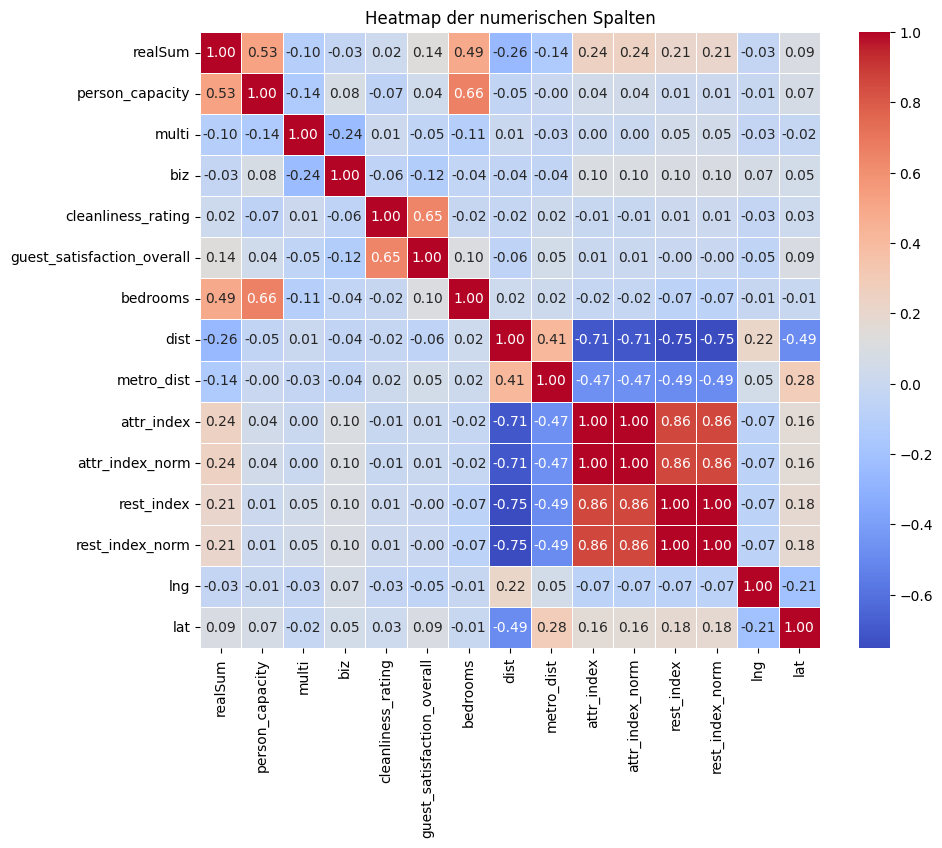

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Beispiel: Datei einlesen (CSV oder Excel)
# df = pd.read_csv("your_file.csv")  # Wenn die Datei im CSV-Format ist
# df = pd.read_excel("your_file.xlsx")  # Wenn die Datei im Excel-Format ist

# Alle numerischen Spalten auswählen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Korrelationsmatrix für numerische Spalten berechnen
correlation_matrix = df[numeric_columns].corr()

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap der numerischen Spalten")
plt.show()
